In [705]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
np.random.seed(1000)

In [702]:
file_paths = [
    "S11_parameter_data_for_zero_orientation.txt",
    "S12_parameter_data_for_zero_orientation.txt",
    "S21_parameter_data_for_zero_orientation.txt",
    "S22_parameter_data_for_zero_orientation.txt"
]
# Function to process each file and merge datasets
def process_file(file_path):
    datasets = []
    with open(file_path, 'r') as file:
        current_dataset = []
        for line in file:
            if line.startswith("#Parameters"):
                if current_dataset:
                    datasets.append(current_dataset)
                    current_dataset = []
                params_str = line[line.index("{") + 1:line.index("}")]
                params = dict(param.split('=') for param in params_str.split(';'))
                current_dataset.append(params)
            elif line.startswith("#"):
                continue
            else:
                data = line.strip().split('\t')
                current_dataset.append(data)
        if current_dataset:
            datasets.append(current_dataset)
    combined_data = []
    for dataset in datasets:
        permittivity_values = dataset[0]
        df_data = dataset[1:]
        s_parameter_name = file_path.split("_parameter_data_for_zero_orientation.txt")[0]
        df = pd.DataFrame(df_data, columns=["Frequency", f"{s_parameter_name}_Real", f"{s_parameter_name}_Imaginary"])
        for key, value in permittivity_values.items():
            if "er1" in key or "er11" in key:
                df[key] = value
        combined_data.append(df)
    return combined_data

all_combined_data = []
for file_path in file_paths:
    combined_data = process_file(file_path)
    combined_data = pd.concat(combined_data, ignore_index=True)
    all_combined_data.append(combined_data)
final_dataframe = all_combined_data[0].copy()
for dataframe in all_combined_data[1:]:
    dataframe = dataframe.iloc[:, 1:3]
    dataframe.reset_index(drop=True, inplace=True)
    final_dataframe = pd.concat([final_dataframe, dataframe], axis=1)
print(final_dataframe)

              Frequency           S11_Real        S11_Imaginary   
0       1.0000000000000  0.010708443820477  -0.0015462124720216  \
1       1.0006999969482  0.010755277238786  -0.0017734571592882   
2       1.0013999938965  0.010795198380947  -0.0020041132811457   
3       1.0020999908447  0.010827971622348  -0.0022378272842616   
4       1.0027999877930  0.010853389278054  -0.0024742297828197   
...                 ...                ...                  ...   
100095  1.6971999406815  0.021881444379687    0.021800480782986   
100096  1.6979000568390  0.022192303091288    0.021639110520482   
100097  1.6986000537872  0.022503089159727    0.021473014727235   
100098  1.6993000507355  0.022813649848104    0.021302131935954   
100099  1.7000000476837  0.023123849183321    0.021126393228769   

                    er1               er11           S12_Real   
0       2.2609046534204   0.04505415985025   0.21881759166718  \
1       2.2609046534204   0.04505415985025   0.23742462694645   


In [706]:
print(final_dataframe.head(20))

          Frequency           S11_Real        S11_Imaginary Permittivity_Real   
0   1.0000000000000  0.010708443820477  -0.0015462124720216   2.2609046534204  \
1   1.0006999969482  0.010755277238786  -0.0017734571592882   2.2609046534204   
2   1.0013999938965  0.010795198380947  -0.0020041132811457   2.2609046534204   
3   1.0020999908447  0.010827971622348  -0.0022378272842616   2.2609046534204   
4   1.0027999877930  0.010853389278054  -0.0024742297828197   2.2609046534204   
5   1.0034999847412  0.010871269740164  -0.0027129407972097   2.2609046534204   
6   1.0041999816895  0.010881460271776  -0.0029535701032728   2.2609046534204   
7   1.0048999786377  0.010883836075664  -0.0031957186292857   2.2609046534204   
8   1.0055999755859  0.010878301225603  -0.0034389849752188   2.2609046534204   
9   1.0062999725342  0.010864786803722  -0.0036829612217844   2.2609046534204   
10  1.0069999694824  0.010843253694475  -0.0039272396825254   2.2609046534204   
11  1.0076999664307  0.01081

In [704]:
final_dataframe.columns = ['Frequency', 'S11_Real', 'S11_Imaginary', 'Permittivity_Real', 'Permittivity_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']

In [697]:
final_dataframe = final_dataframe[['Frequency', 'Permittivity_Real', 'Permittivity_Imaginary','S11_Real', 'S11_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']]

In [698]:
columns = final_dataframe.columns
columns

Index(['Frequency', 'Permittivity_Real', 'Permittivity_Imaginary', 'S11_Real',
       'S11_Imaginary', 'S12_Real', 'S12_Imaginary', 'S21_Real',
       'S21_Imaginary', 'S22_Real', 'S22_Imaginary'],
      dtype='object')

In [699]:
final_dataframe.dropna(inplace=True)
final_dataframe[columns] = final_dataframe[columns].apply(pd.to_numeric)

In [700]:
final_dataframe[0:5]

,Frequency,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000,2.260905,0.045054,0.010708,-0.001546,0.218818,0.964274,0.218818,0.964274,0.010327,-0.003227
1,1.0007,2.260905,0.045054,0.010755,-0.001773,0.237425,0.960461,0.237425,0.960461,0.010343,-0.003442
2,1.0014,2.260905,0.045054,0.010795,-0.002004,0.255947,0.956298,0.255947,0.956298,0.010353,-0.003656
3,1.0021,2.260905,0.045054,0.010828,-0.002238,0.274378,0.951784,0.274378,0.951784,0.010358,-0.003870
4,1.0028,2.260905,0.045054,0.010853,-0.002474,0.292710,0.946918,0.292710,0.946918,0.010356,-0.004082


In [707]:
data_subset = final_dataframe.drop(columns=['Frequency'])
plt.figure(figsize=(10, 8))
for i, column in enumerate(data_subset.columns):
    plt.subplot(5, 5, i+1)
    plt.hist(data_subset[column], bins=20, edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
data_subset = final_dataframe.drop(columns=['Frequency'])
sns.pairplot(data_subset, diag_kind='kde') 
plt.show()

In [ ]:
data_subset = final_dataframe.drop(columns=['Frequency'])
plt.figure(figsize=(12, 6))
sns.heatmap(data_subset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [679]:
from sklearn.preprocessing import MinMaxScaler
no_freq = ['Frequency','S11_Real', 'S11_Imaginary','S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary','Permittivity_Real', 'Permittivity_Imaginary']
X_norm = MinMaxScaler().fit(final_dataframe[no_freq])
final_dataframe[no_freq] =  X_norm.transform(final_dataframe[no_freq])

In [680]:
final_dataframe

,Frequency,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,0.000,0.151990,0.449730,0.605756,0.525788,0.610065,0.984463,0.610065,0.984463,0.619351,0.519105
1,0.001,0.151990,0.449730,0.606384,0.522751,0.619412,0.982547,0.619412,0.982547,0.619556,0.516144
2,0.002,0.151990,0.449730,0.606920,0.519669,0.628716,0.980455,0.628716,0.980455,0.619688,0.513191
3,0.003,0.151990,0.449730,0.607360,0.516545,0.637974,0.978187,0.637974,0.978187,0.619747,0.510248
4,0.004,0.151990,0.449730,0.607701,0.513386,0.647183,0.975742,0.647183,0.975742,0.619731,0.507316
...,...,...,...,...,...,...,...,...,...,...,...
100095,0.996,0.767974,0.587403,0.755665,0.837798,0.314447,0.963783,0.314447,0.963783,0.885038,0.554367
100096,0.997,0.767974,0.587403,0.759836,0.835641,0.318993,0.965606,0.318994,0.965606,0.886342,0.550557
100097,0.998,0.767974,0.587403,0.764006,0.833421,0.323558,0.967385,0.323558,0.967385,0.887619,0.546733
100098,0.999,0.767974,0.587403,0.768173,0.831138,0.328140,0.969120,0.328141,0.969120,0.888866,0.542895


In [681]:
X = final_dataframe[['Frequency','S11_Real', 'S11_Imaginary','S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']].values
y = final_dataframe[['Permittivity_Real', 'Permittivity_Imaginary']].values

In [ ]:
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]
split_point = int(0.80 * len(X))
X_train = X[:split_point]
y_train = y[:split_point]
X_val = X[split_point:]
y_val = y[split_point:]

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_val.shape

In [ ]:
y_val.shape

In [682]:
def mae_loss(y_true, y_pred):
    y_true_real, y_true_imag = tf.split(y_true, 2, axis=-1)
    y_pred_real, y_pred_imag = tf.split(y_pred, 2, axis=-1)
    loss_real = tf.losses.mean_absolute_error(y_true_real, y_pred_real)
    loss_imag = tf.losses.mean_absolute_error(y_true_imag, y_pred_imag)
    return loss_real + loss_imag
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
     keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(y.shape[1], activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss=[mae_loss],
              metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanSquaredError()])

In [683]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 256)               2560      
                                                                 
 dense_77 (Dense)            (None, 32)                8224      
                                                                 
 dense_78 (Dense)            (None, 2)                 66        
                                                                 
Total params: 10850 (42.38 KB)
Trainable params: 10850 (42.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
201/201 [==============================] - 0s 1ms/step - loss: 0.5967 - mean_absolute_error: 0.2983 - mean_squared_error: 0.1336 - val_loss: 0.4846 - val_mean_absolute_error: 0.2423 - val_mean_squared_error: 0.0797
Epoch 2/200
201/201 [==============================] - 0s 1ms/step - loss: 0.4600 - mean_absolute_error: 0.2300 - mean_squared_error: 0.0724 - val_loss: 0.4280 - val_mean_absolute_error: 0.2140 - val_mean_squared_error: 0.0639
Epoch 3/200
201/201 [==============================] - 0s 1ms/step - loss: 0.3918 - mean_absolute_error: 0.1959 - mean_squared_error: 0.0572 - val_loss: 0.3470 - val_mean_absolute_error: 0.1735 - val_mean_squared_error: 0.0500
Epoch 4/200
201/201 [==============================] - 0s 1ms/step - loss: 0.3132 - mean_absolute_error: 0.1566 - mean_squared_error: 0.0464 - val_loss: 0.2866 - val_mean_absolute_error: 0.1433 - val_mean_squared_error: 0.0435
Epoch 5/200
201/201 [==============================] - 0s 1ms/step - loss: 0.2797 - mean_abs

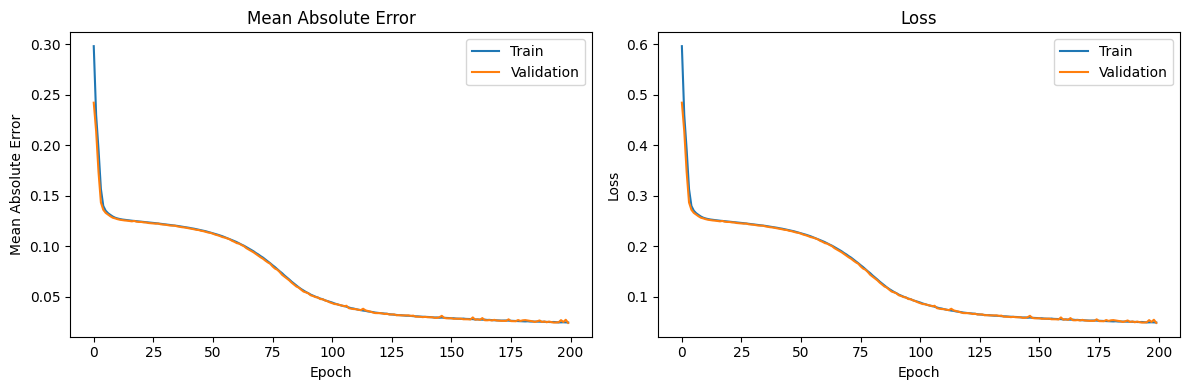

In [684]:
history = model.fit(X, y, validation_data=(X_val, y_val), epochs=200, batch_size=500)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()


626/626 [==============================] - 0s 252us/step


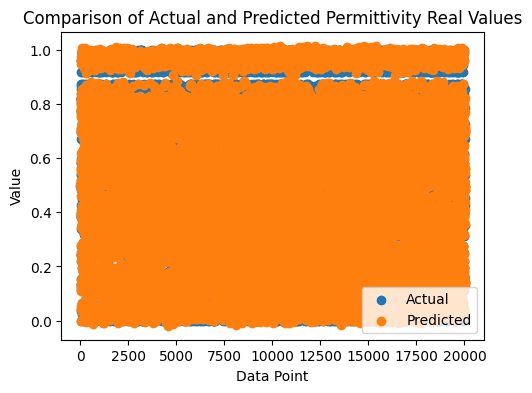

In [685]:
y_pred = model.predict(X_val)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val[:, 0], label='Actual')
plt.scatter(range(len(y_pred)), y_pred[:, 0], label='Predicted')
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

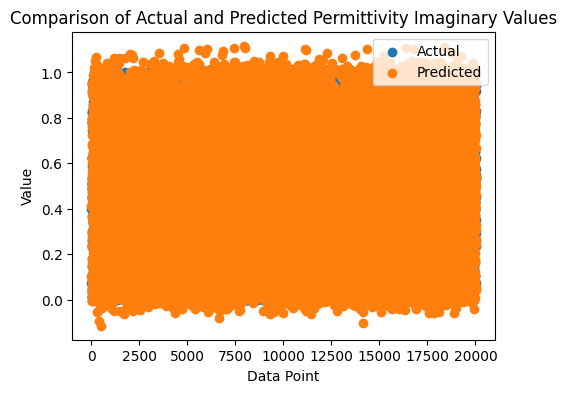

In [686]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val[:, 1], label='Actual')
plt.scatter(range(len(y_pred)), y_pred[:, 1], label='Predicted')
plt.title('Comparison of Actual and Predicted Permittivity Imaginary Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

In [687]:
file_paths = [
    "mea_rot_0.txt"
]
# Function to process each file and merge datasets
def process_file(file_path):
    datasets = []
    with open(file_path, 'r') as file:
        current_dataset = []
        for line in file:
            if line.startswith("#Parameters"):
                if current_dataset:
                    datasets.append(current_dataset)
                    current_dataset = []
                params_str = line[line.index("{") + 1:line.index("}")]
                params = dict(param.split('=') for param in params_str.split(';'))
                current_dataset.append(params)
            elif line.startswith("#"):
                continue
            else:
                data = line.strip().split('\t')
                current_dataset.append(data)
        if current_dataset:
            datasets.append(current_dataset)
    dictionary = {
    0: "S11",
    1: "S21",
    2: "S12",
    3: "S22"
    }
    combined_data = []
    for index, dataset in enumerate(datasets):
        permittivity_values = dataset[0]
        df_data = dataset[1:]
        s_parameter_name = dictionary[index]
        df = pd.DataFrame(df_data, columns=["Frequency", f"{s_parameter_name}_Real", f"{s_parameter_name}_Imaginary"])
        for key, value in permittivity_values.items():
            if "er1" in key or "er11" in key:
                df[key] = value
        combined_data.append(df)
    return combined_data
all_combined_data = []
for file_path in file_paths:
    combined_data = process_file(file_path)
    all_combined_data.append(combined_data)
final_dataframe = all_combined_data[0][0].copy()
for dataframe in all_combined_data[0][1:]:
    dataframe = dataframe.iloc[:, 1:3]
    dataframe.reset_index(drop=True, inplace=True)
    final_dataframe = pd.concat([final_dataframe, dataframe], axis=1)
print(final_dataframe)



            Frequency            S11_Real        S11_Imaginary  er1  er11   
0     1.0000000000000  -0.019713426000000  -0.0060391319000000    5   0.1  \
1     1.0007000000000  -0.019482541585540  -0.0063846667326036    5   0.1   
2     1.0014000000000  -0.019137625649780  -0.0065910681665272    5   0.1   
3     1.0021000000000  -0.018813112374285  -0.0069965346072957    5   0.1   
4     1.0028000000000  -0.018616413134193  -0.0076122439176546    5   0.1   
...               ...                 ...                  ...  ...   ...   
996   1.6972000000000  -0.018049095839713  -0.0014139190162672    5   0.1   
997   1.6979000000000  -0.018037166429403  -0.0016220376806550    5   0.1   
998   1.6986000000000  -0.018063113718148  -0.0018359748692244    5   0.1   
999   1.6993000000000  -0.018097034256059  -0.0020107864196622    5   0.1   
1000  1.7000000000000  -0.018068083000000  -0.0021178315000000    5   0.1   

              S21_Real       S21_Imaginary          S12_Real   
0     0.998

In [688]:
final_dataframe.columns = ['Frequency', 'S11_Real', 'S11_Imaginary', 'Permittivity_Real', 'Permittivity_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']
final_dataframe = final_dataframe[['Frequency', 'Permittivity_Real', 'Permittivity_Imaginary','S11_Real', 'S11_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']]
final_dataframe.columns

Index(['Frequency', 'Permittivity_Real', 'Permittivity_Imaginary', 'S11_Real',
       'S11_Imaginary', 'S12_Real', 'S12_Imaginary', 'S21_Real',
       'S21_Imaginary', 'S22_Real', 'S22_Imaginary'],
      dtype='object')

In [ ]:
final_dataframe.dropna(inplace=True)
final_dataframe[columns] = final_dataframe[columns].apply(pd.to_numeric)

In [689]:
from sklearn.preprocessing import MinMaxScaler
no_freq = ['Frequency','S11_Real', 'S11_Imaginary','S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary','Permittivity_Real', 'Permittivity_Imaginary']
final_dataframe[no_freq] =  X_norm.transform(final_dataframe[no_freq])

In [690]:
X = final_dataframe[['Frequency', 'S11_Real', 'S11_Imaginary','S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']].values
y = final_dataframe[['Permittivity_Real', 'Permittivity_Imaginary']].values

32/32 [==============================] - 0s 314us/step


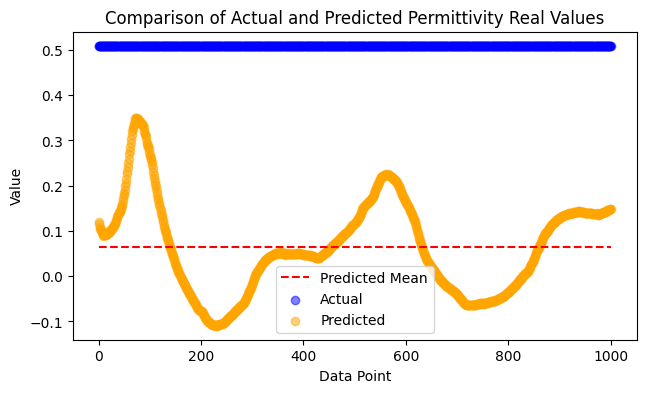

In [692]:
import numpy as np

y_pred = model.predict(X)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y) - 1], [np.mean(y_pred[:, 0]), np.mean(y_pred[:, 0])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y)), y[:, 0], label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(y)), y_pred[:, 0], label='Predicted', color='orange', alpha=0.5)
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()




32/32 [==============================] - 0s 428us/step


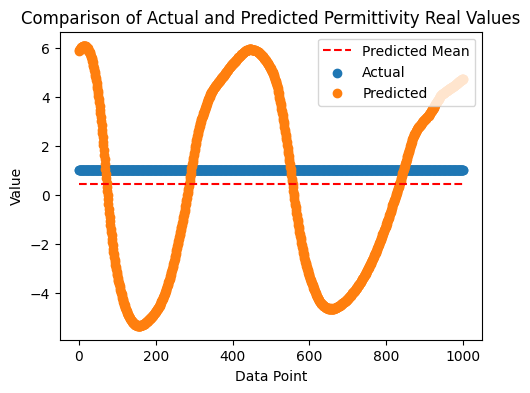

In [691]:
y_pred = model.predict(X)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y) - 1], [np.mean(y_pred[:, 1]), np.mean(y_pred[:, 1])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y)), y[:, 1], label='Actual')
plt.scatter(range(len(y)), y_pred[:, 1], label='Predicted')
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()